## Multi Agent

### Imports

In [17]:
%%capture --no-stderr
%pip install --quiet -U langchain==0.1.14 langchain-core==0.1.36 langgraph==0.0.40 langchain-openai==0.1.3 openai==1.23.2

In [32]:
%%capture --no-stderr
! pip install langchain_openai

In [33]:
%%capture --no-stderr
! pip install langgraph-supervisor

### Model

In [22]:
from langchain_openai import ChatOpenAI

from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent

In [23]:
llm_model = ChatOpenAI(temperature=0.0, 
                        model="gpt-4-turbo",
                       openai_api_key="XXXX")

### Tools

In [24]:
def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

def multiply(a: float, b: float) -> float:
    """Multiply two numbers."""
    return a * b

def web_search(query: str) -> str:
    """Search the web for information."""
    return (
        "Here are the headcounts for each of the FAANG companies in 2024:\n"
        "1. **Facebook (Meta)**: 67,317 employees.\n"
        "2. **Apple**: 164,000 employees.\n"
        "3. **Amazon**: 1,551,000 employees.\n"
        "4. **Netflix**: 14,000 employees.\n"
        "5. **Google (Alphabet)**: 181,269 employees."
    )

### Agents

In [25]:
math_agent = create_react_agent(
    model=llm_model,
    tools=[add, multiply],
    name="math_expert",
    prompt="You are a math expert. Always use one tool at a time."
)

research_agent = create_react_agent(
    model=llm_model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search. Do not do any math."
)

### Supervisor

In [26]:
# Create supervisor workflow
workflow = create_supervisor(
    [research_agent, math_agent],
    model=llm_model,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent."
    )
)


In [27]:
# Compile and run
app = workflow.compile()

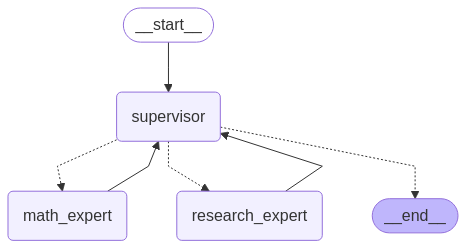

In [28]:
app

In [29]:
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what's the combined headcount of the FAANG companies in 2024?"
        }
    ]
})

In [30]:
result['messages'][-1].content

'The combined headcount of the FAANG companies in 2024 is approximately 1,977,586 employees.'